In [110]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import datetime 
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [ ]:
#A little background:

#http://wolfstreet.com/2016/07/06/deutsche-bank-crisis-coco-bonds-shares-new-low-bond-buybacks/

In [53]:
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2016, 8, 12)
db = data.DataReader("DB", 'google', start, end)#Deutsche Bank
dax = data.DataReader("^GDAXI", 'yahoo', start, end)#DAX
iyf= data.DataReader("IYF", 'google', start, end)#US financials
eufn= data.DataReader("EUFN", 'google', start, end)#EU financials



#db.describe()

In [57]:
#lets normalize this
eufn_close = eufn['Close']/eufn['Close'][0]
iyf_close = iyf['Close']/iyf['Close'][0]
dax_close = dax['Close']/dax['Close'][0]
db_close = db['Close']/db['Close'][0]


In [72]:
#pd.concat([s3, s4, s5], axis=1, keys=['red','blue','yellow'])
df_perform = pd.concat([eufn_close, iyf_close, dax_close, db_close], axis=1, keys=['eufn_close', 'iyf_close', 'dax_close', 'db_close'])

In [73]:
df_perform.head()

,eufn_close,iyf_close,dax_close,db_close
Date,,,,
2011-01-03,1.000000,1.000000,1.000000,1.000000
2011-01-04,1.005579,0.996416,0.997941,1.018023
2011-01-05,1.000000,1.007680,0.992858,1.043445
2011-01-06,0.994886,1.002731,0.998805,1.027319
2011-01-07,0.978615,0.994368,0.994005,1.003605


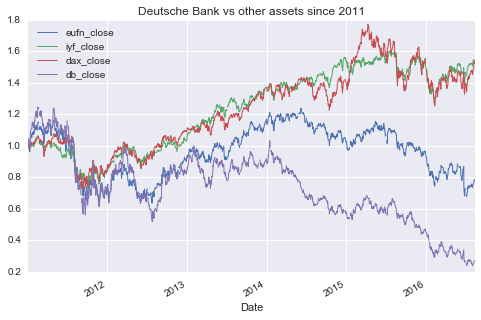

In [74]:
#This plot shows how Deutsche Bank has performed over the past 5 years vis-a-vis other companies
df_perform.plot(figsize=(8,5), lw= 1,grid = True,title='Deutsche Bank vs other assets since 2011', legend=True);

In [70]:
#Let's take log returns of securities aka continuously compounded returns
eufn_returns = np.log(eufn['Close']/eufn['Close'].shift(1))
iyf_returns = np.log(iyf['Close']/iyf['Close'].shift(1))
dax_returns = np.log(dax['Close']/dax['Close'].shift(1))
db_returns = np.log(db['Close']/db['Close'].shift(1))
#pd.concat([s3, s4, s5], axis=1, keys=['red','blue','yellow'])
df_log_returns = pd.concat([eufn_returns, iyf_returns,dax_returns, db_returns], axis=1, keys=['eufn_returns', 'iyf_returns','dax_returns', 'db_returns'])

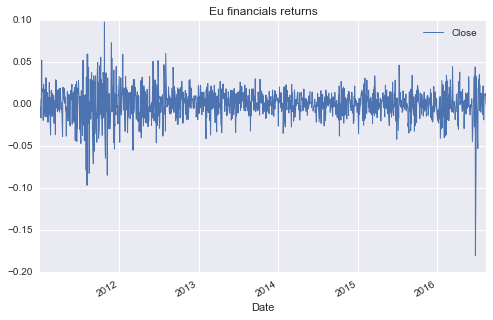

In [78]:
eufn_returns.plot(figsize=(8,5), lw= 1,grid = True,title='Eu financials returns', legend=True);

In [82]:
#log returns for past five days of selected securities relevant to Deutsche Bank
df_log_returns.tail()

,eufn_returns,iyf_returns,dax_returns,db_returns
Date,,,,
2016-08-08,0.012240,0.000885,0.006265,0.024043
2016-08-09,0.010889,0.001768,0.024667,0.019118
2016-08-10,0.010772,-0.006756,-0.003937,0.035066
2016-08-11,0.004158,0.000444,0.008596,0.000703
2016-08-12,-0.001780,-0.001779,-0.002741,0.001404


In [94]:
#Let's get some moving averages
db['50_day'] = db['Close'].rolling(window=50, center=False).mean()
db['100_day'] = db['Close'].rolling(window=100, center=False).mean()
db['150_day'] = db['Close'].rolling(window=150, center=False).mean()
db['200_day'] = db['Close'].rolling(window=200, center=False).mean()


db[['Close', '50_day', '100_day', '150_day','200_day']].tail()

,Close,50_day,100_day,150_day,200_day
Date,,,,,
2016-08-08,13.47,14.8016,16.1146,17.006600,19.23255
2016-08-09,13.73,14.7136,16.0607,16.941600,19.14965
2016-08-10,14.22,14.6420,16.0102,16.882133,19.06700
2016-08-11,14.23,14.5742,15.9618,16.825533,18.98640
2016-08-12,14.25,14.5084,15.9172,16.773200,18.90665


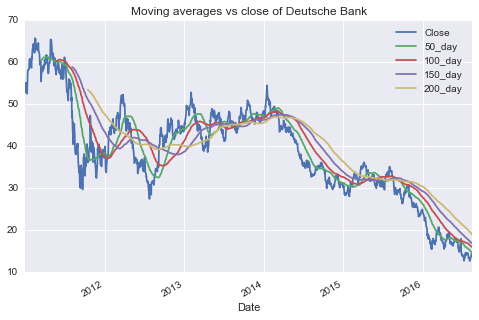

In [95]:
db[['Close', '50_day', '100_day', '150_day','200_day']].plot(figsize=(8,5), grid=True, title="Moving averages vs close of Deutsche Bank");

In [97]:
db_50 = db['50_day']
db_50_plus_10 = db_50*1.10
db_50_minus_10 = db_50*.90

In [101]:
db_50_10pct_window = pd.concat([db['Close'],db_50, db_50_plus_10, db_50_minus_10], axis=1, keys=['db_close','db_50', 'db_50_plus_10', 'db_50_minus_10'])

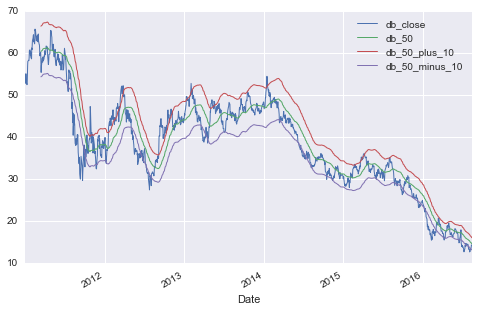

In [102]:
db_50_10pct_window.plot(figsize=(8,5), lw= 1,grid = True);

In [109]:
#What percentage of time did DB close below the .90 mark of its 50 day mavg?
len(np.where(db_50_10pct_window['db_close'] < db_50_10pct_window['db_50_minus_10'])[0])/float(len(db_50_10pct_window))

0.16843595187544233

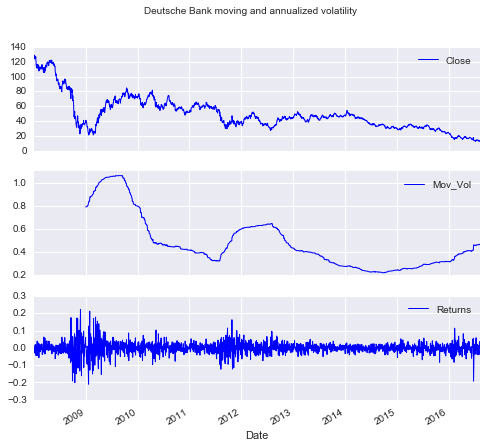

In [128]:
#lets have a look at volatility
import math
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2016, 8, 12)
db = data.DataReader("DB", 'google', start, end)#Deutsche Bank
db['Returns'] = db_returns = np.log(db['Close']/db['Close'].shift(1))
db['Mov_Vol'] = db_returns.rolling(window=252, center=False).std()*math.sqrt(252)
#db_returns.std()


db[['Close', 'Mov_Vol', 'Returns']].plot(subplots=True, style='b', figsize=(8,7), grid=True, lw=1, title='Deutsche Bank moving and annualized volatility');